In [26]:
import numpy as np
import pandas as pd

In [27]:
df=pd.read_csv("C:\\Users\\Shuddhamati\\Desktop\\ML\\All.csv")

In [28]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [29]:
df.tail()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam
36706,40,3,25,6.666666,16,3.250000,3,35,31,19,...,7,6,7,0.674351,0.801139,0.697282,0.730563,0.731481,0.769238,spam


In [30]:
columns_with_same_value = []

for column in df.columns:
    if df[column].nunique() == 1:
        columns_with_same_value.append(column)

print("Columns with the same value for all records:")
print(columns_with_same_value)

Columns with the same value for all records:
['ISIpAddressInDomainName']


In [31]:
df.drop('ISIpAddressInDomainName',axis=1,inplace=True)

In [32]:
df['isPortEighty'].value_counts()

-1    36693
 0       14
Name: isPortEighty, dtype: int64

In [33]:
df.shape

(36707, 79)

In [34]:
df.isna().sum()

Querylength                 0
domain_token_count          0
path_token_count            0
avgdomaintokenlen           0
longdomaintokenlen          0
                         ... 
Entropy_DirectoryName    8468
Entropy_Filename          236
Entropy_Extension          40
Entropy_Afterpath           6
URL_Type_obf_Type           0
Length: 79, dtype: int64

In [35]:
df['Entropy_DirectoryName'].isna().sum()

8468

In [36]:
df = df.dropna(subset=df.columns)
# df.fillna(0, inplace=True)

In [37]:
df.isna().sum()

Querylength              0
domain_token_count       0
path_token_count         0
avgdomaintokenlen        0
longdomaintokenlen       0
                        ..
Entropy_DirectoryName    0
Entropy_Filename         0
Entropy_Extension        0
Entropy_Afterpath        0
URL_Type_obf_Type        0
Length: 79, dtype: int64

In [38]:
df.shape

(18982, 79)

In [39]:
dummies=pd.get_dummies(df.URL_Type_obf_Type)

In [40]:
dummies

,Defacement,benign,malware,phishing,spam
35,1,0,0,0,0
37,1,0,0,0,0
38,1,0,0,0,0
39,1,0,0,0,0
40,1,0,0,0,0
...,...,...,...,...,...
36702,0,0,0,0,1
36703,0,0,0,0,1
36704,0,0,0,0,1
36705,0,0,0,0,1


In [41]:
df2=pd.concat([df,dummies],axis='columns')
df2

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type,Defacement,benign,malware,phishing,spam
35,0,4,4,6.250000,17,3.750000,4,4,2,0,...,0.916667,1.000000,1.000000,-1.000000,Defacement,1,0,0,0,0
37,22,4,10,6.250000,17,3.500000,4,19,10,0,...,0.916667,0.748105,0.757206,0.749167,Defacement,1,0,0,0,0
38,23,4,10,6.250000,17,3.500000,4,19,10,0,...,0.916667,0.747622,0.756298,0.748268,Defacement,1,0,0,0,0
39,22,4,10,6.250000,17,3.500000,4,19,10,0,...,0.916667,0.742090,0.750292,0.741506,Defacement,1,0,0,0,0
40,23,4,10,6.250000,17,3.500000,4,19,10,0,...,0.916667,0.747622,0.756298,0.748268,Defacement,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,0.777498,0.690227,0.656684,0.796205,spam,0,0,0,0,1
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,0.879588,0.674400,0.674671,-1.000000,spam,0,0,0,0,1
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,0.684777,0.713622,0.717187,0.705245,spam,0,0,0,0,1
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,0.871049,0.745932,0.758824,0.790772,spam,0,0,0,0,1


In [42]:
df2=df2.drop(['URL_Type_obf_Type'],axis='columns')

In [43]:
df2

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,Defacement,benign,malware,phishing,spam
35,0,4,4,6.250000,17,3.750000,4,4,2,0,...,0.768811,0.916667,1.000000,1.000000,-1.000000,1,0,0,0,0
37,22,4,10,6.250000,17,3.500000,4,19,10,0,...,0.768811,0.916667,0.748105,0.757206,0.749167,1,0,0,0,0
38,23,4,10,6.250000,17,3.500000,4,19,10,0,...,0.768811,0.916667,0.747622,0.756298,0.748268,1,0,0,0,0
39,22,4,10,6.250000,17,3.500000,4,19,10,0,...,0.768811,0.916667,0.742090,0.750292,0.741506,1,0,0,0,0
40,23,4,10,6.250000,17,3.500000,4,19,10,0,...,0.768811,0.916667,0.747622,0.756298,0.748268,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,0.791265,0.777498,0.690227,0.656684,0.796205,0,0,0,0,1
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,0.820010,0.879588,0.674400,0.674671,-1.000000,0,0,0,0,1
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,0.801139,0.684777,0.713622,0.717187,0.705245,0,0,0,0,1
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,0.897617,0.871049,0.745932,0.758824,0.790772,0,0,0,0,1


In [44]:
features=df2.drop(dummies,axis='columns')

In [45]:
features

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
35,0,4,4,6.250000,17,3.750000,4,4,2,0,...,1,1,0,-1,0.726945,0.768811,0.916667,1.000000,1.000000,-1.000000
37,22,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.686486,0.768811,0.916667,0.748105,0.757206,0.749167
38,23,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268
39,22,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.683476,0.768811,0.916667,0.742090,0.750292,0.741506
40,23,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,11,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,2,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,14,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,1,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772


In [46]:
target=dummies

In [47]:
target

,Defacement,benign,malware,phishing,spam
35,1,0,0,0,0
37,1,0,0,0,0
38,1,0,0,0,0
39,1,0,0,0,0
40,1,0,0,0,0
...,...,...,...,...,...
36702,0,0,0,0,1
36703,0,0,0,0,1
36704,0,0,0,0,1
36705,0,0,0,0,1


In [64]:
import seaborn as sns

C:\Users\Shuddhamati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URL_Type_obf_Type', ylabel='count'>

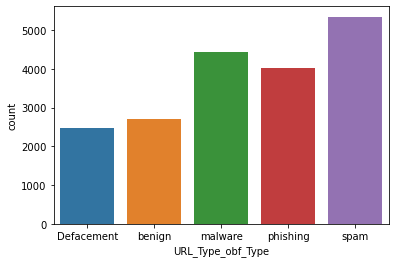

In [65]:
sns.countplot('URL_Type_obf_Type',data=df)

<AxesSubplot:xlabel='URL_Type_obf_Type', ylabel='URL_sensitiveWord'>

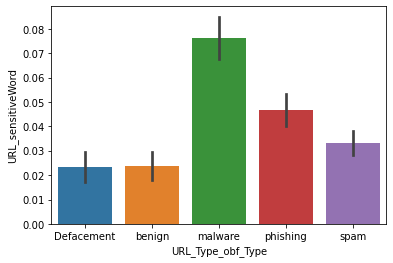

In [66]:
sns.barplot(y='URL_sensitiveWord',x='URL_Type_obf_Type',data=df)

<AxesSubplot:xlabel='URL_Type_obf_Type', ylabel='urlLen'>

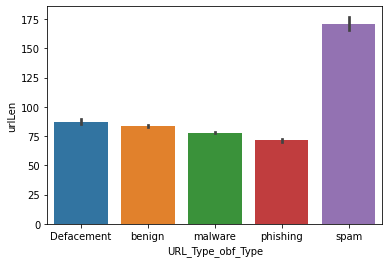

In [67]:
sns.barplot(y='urlLen',x='URL_Type_obf_Type',data=df)

<AxesSubplot:xlabel='URL_Type_obf_Type', ylabel='SymbolCount_Domain'>

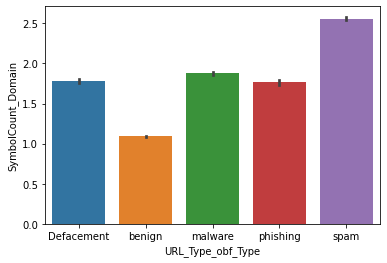

In [68]:
sns.barplot(y='SymbolCount_Domain',x='URL_Type_obf_Type',data=df)

<AxesSubplot:xlabel='URL_Type_obf_Type', ylabel='Querylength'>

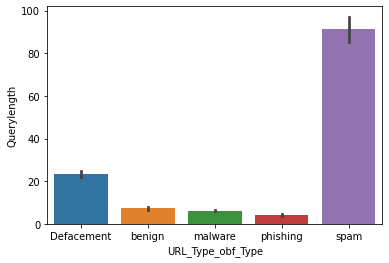

In [69]:
sns.barplot(y='Querylength',x='URL_Type_obf_Type',data=df)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.1, random_state=5)

In [49]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
model.score(X_test,y_test)

0.9541864139020537

In [62]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:

treemodel=DecisionTreeClassifier()

In [59]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred=treemodel.predict(X_test)

In [61]:
treemodel.score(X_test,y_test)

0.9447077409162717